In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn
import theano.tensor as tt
import warnings
from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score,
                             precision_recall_curve)
from sklearn.metrics import confusion_matrix


WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
DataTrain=pd.read_csv('train.csv')
#DataTrain.describe()

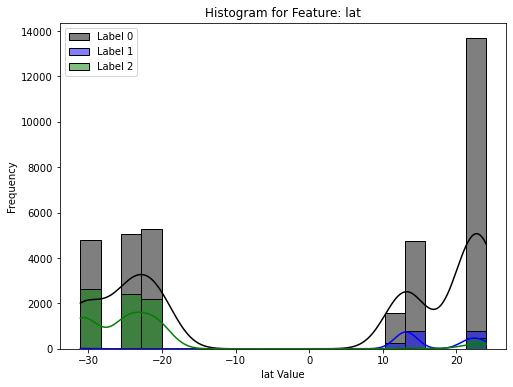

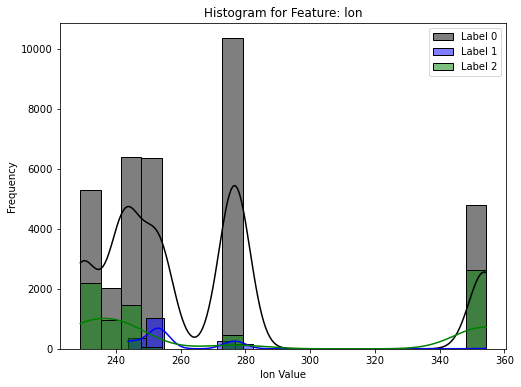

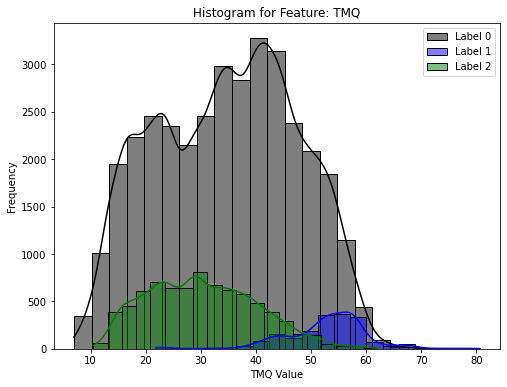

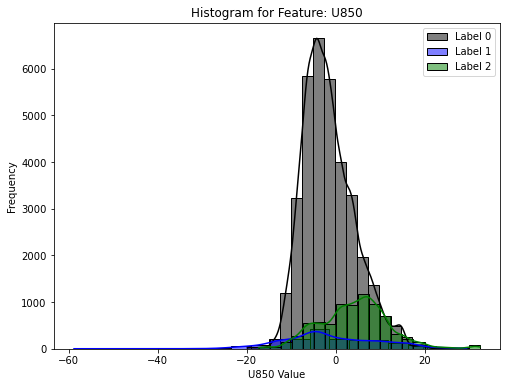

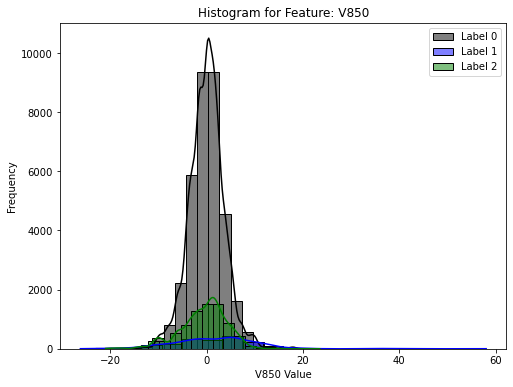

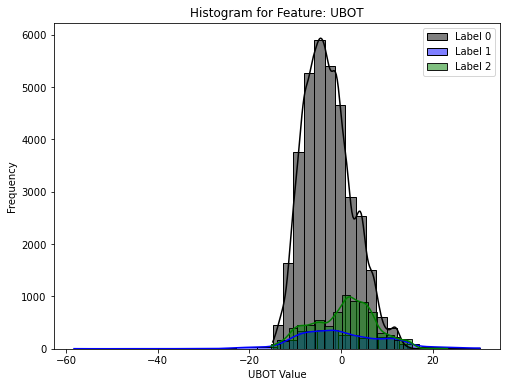

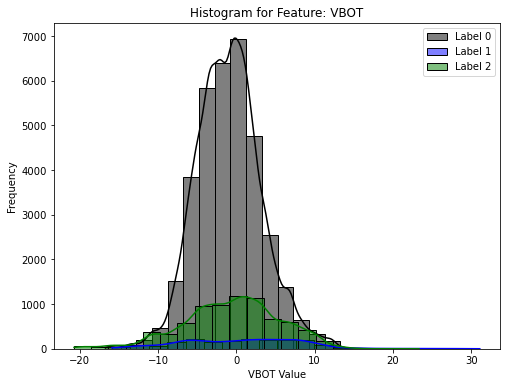

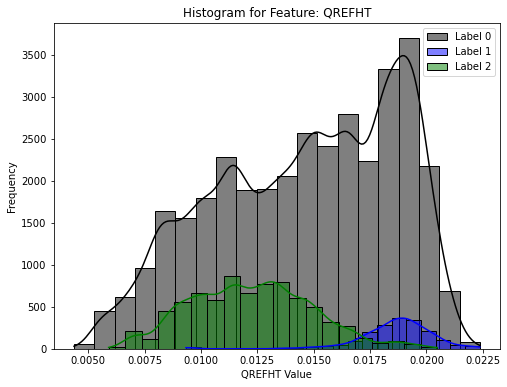

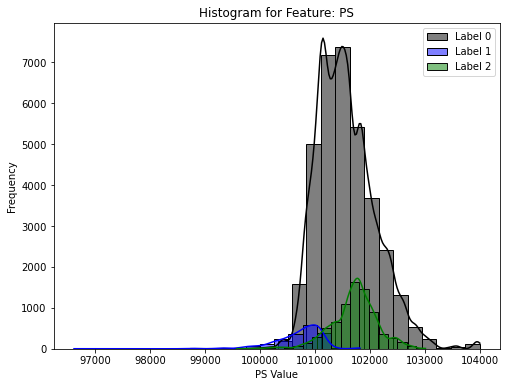

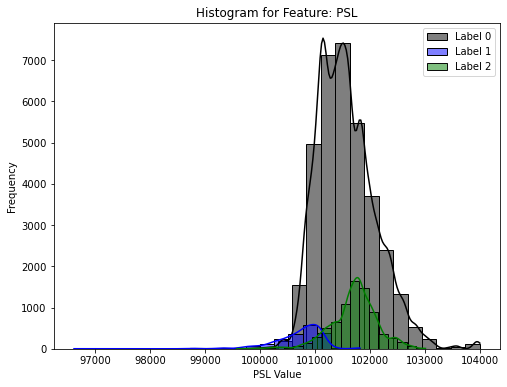

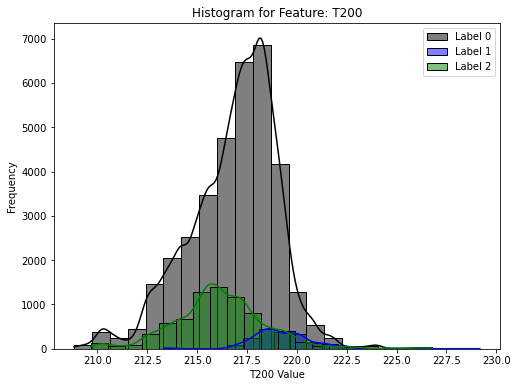

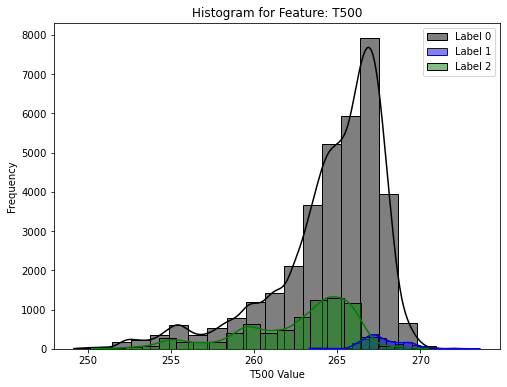

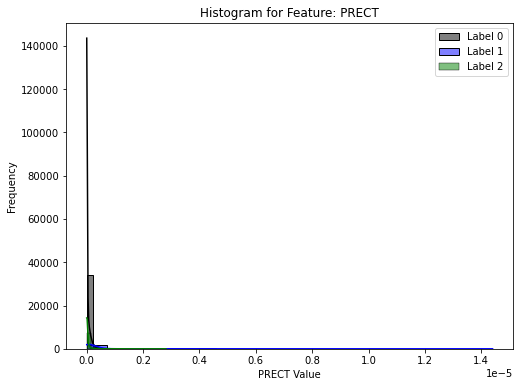

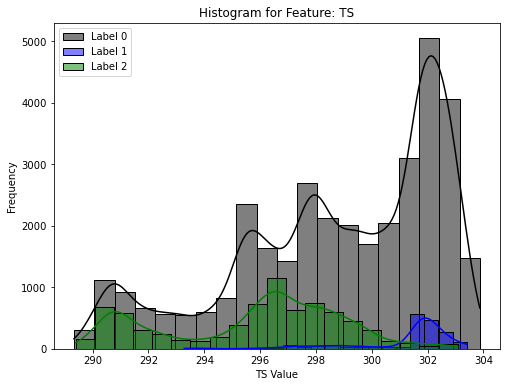

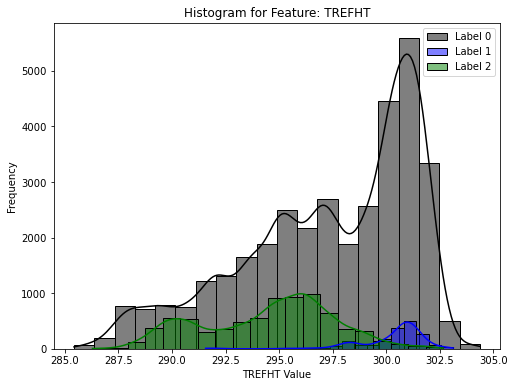

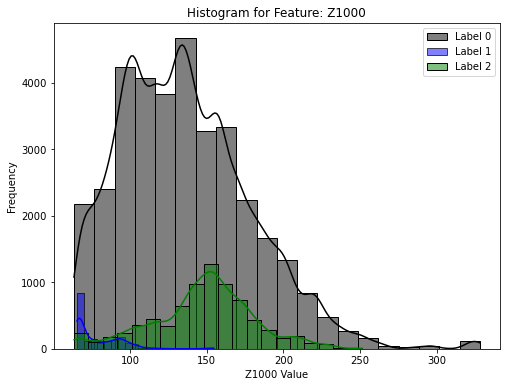

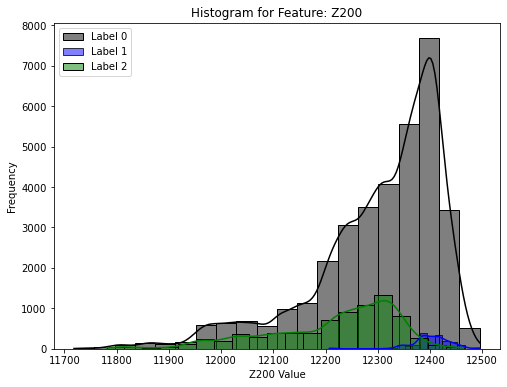

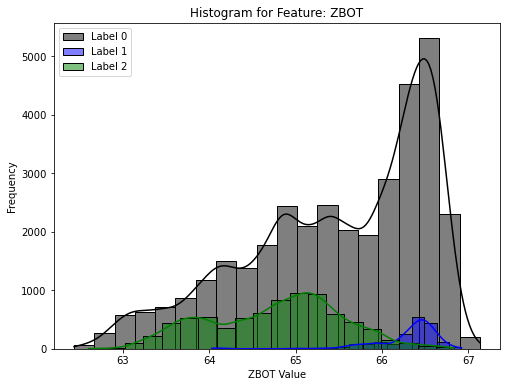

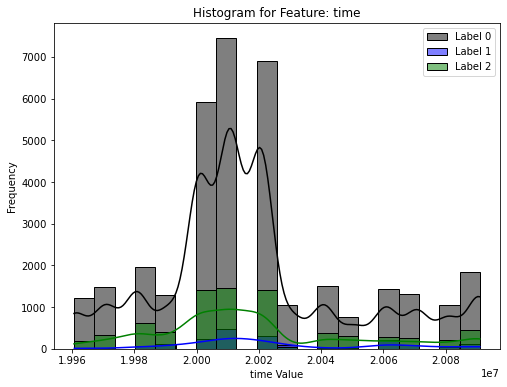

In [3]:
import os
label_column = 'Label'

# Separate the data into different groups based on the labels
label_groups = DataTrain.groupby(label_column)

# Define the number of bins for the histograms
num_bins = 20

# Specify the directory to save the figures
output_directory = 'histograms'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through each feature and create histograms
for feature in DataTrain.columns[1:]:
    if feature != label_column:
        plt.figure(figsize=(8, 6))
        for label, group in label_groups:
            if label==0:
                color="black"
            elif label==1:
                color="blue"
            else:
                color="green"


            sns.histplot(group[feature], bins=num_bins,
                         kde=True, label=f'Label {label}',color=color)
        plt.title(f'Histogram for Feature: {feature}')
        plt.xlabel(f'{feature} Value')
        plt.ylabel('Frequency')
        plt.legend()
        output_filename = os.path.join(
            output_directory, f'histogram_{feature}.png')
        plt.savefig(output_filename)
        plt.show()
        plt.close()
